<a href="https://colab.research.google.com/github/Salva13s/TrabajoPneumonia/blob/main/CNN_a_mano.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [259]:
!pip install medmnist
!pip install --upgrade medmnist
!pip istall tesorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: unknown command "istall" - maybe you meant "install"


## Imports necesarios

In [260]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense
from tensorflow.keras.losses import BinaryCrossentropy, CategoricalCrossentropy
from tensorflow.keras.optimizers import SGD, Adam
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tqdm import tqdm
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import medmnist
from medmnist import INFO, Evaluator
from medmnist import PneumoniaMNIST
import tensorflow as tf
import random

In [261]:
seed = 1234
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)

## Desacargar la data

In [262]:
data_flag = 'pneumoniamnist'

download = True

NUM_EPOCHS = 3
BATCH_SIZE = 128
lr = 0.001

info = INFO[data_flag]
task = info['task']
n_channels = info['n_channels']
n_classes = len(info['label'])

DataClass = getattr(medmnist, info['python_class'])

In [263]:

# load the data
train_dataset = PneumoniaMNIST(split='train',  download=download)
test_dataset = PneumoniaMNIST(split='test',  download=download)
val_dataset = PneumoniaMNIST(split="val", download=download)


Using downloaded and verified file: /root/.medmnist/pneumoniamnist.npz
Using downloaded and verified file: /root/.medmnist/pneumoniamnist.npz
Using downloaded and verified file: /root/.medmnist/pneumoniamnist.npz


##Procesamiento de datos

In [264]:
train_images = train_dataset.imgs
train_labels = train_dataset.labels
test_images = test_dataset.imgs
test_labels = test_dataset.labels
val_images = val_dataset.imgs
val_labels = val_dataset.labels

In [265]:
print("etiquetas de train set: ",train_labels.shape)
print("-----------------------")
print("imagenes de train set: ",train_images.shape)
print("-----------------------")
print("etiquetas de test set: ",test_labels.shape)
print("-----------------------")
print("etiquetas de test set: ",test_images.shape)
print("-----------------------")
print("etiquetas de val set: ",val_labels.shape)
print("-----------------------")
print("etiquetas de val set: ",val_images.shape)

etiquetas de train set:  (4708, 1)
-----------------------
imagenes de train set:  (4708, 28, 28)
-----------------------
etiquetas de test set:  (624, 1)
-----------------------
etiquetas de test set:  (624, 28, 28)
-----------------------
etiquetas de val set:  (524, 1)
-----------------------
etiquetas de val set:  (524, 28, 28)


In [266]:
class_names = ["normal", "pneumonia"]

In [267]:
train_labels2 = train_labels.flatten()
test_labels2 = test_labels.flatten()
val_labels2 = val_labels.flatten()


In [268]:

print("etiquetas de test",test_labels2)
print("etiquetas de train",train_labels2)

etiquetas de test [1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0
 1 0 0 1 0 0 0 0 1 0 1 1 1 0 1 0 1 0 0 1 0 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0 1
 1 1 1 0 0 1 1 1 1 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1 0 0 1 0 1
 1 0 1 0 1 1 1 0 0 1 1 1 0 1 0 0 1 0 1 1 0 1 0 1 1 0 1 1 0 1 1 0 0 0 0 0 0
 1 1 0 1 0 1 1 1 1 1 1 1 0 0 1 1 0 0 0 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1
 0 0 0 1 0 1 0 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 0 0
 0 1 0 1 0 1 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0
 0 1 1 1 1 0 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 0 0 0 1 1 0 1 1 1 1 0 1 0 0 1 1
 1 0 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 0 1 0
 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 1 0 0 1 0 0 1 1 1 1 1 1 1 0 1 0 0 1
 0 1 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0 0 0 1 0 1 0 1 0 1 1 1 1 1 1 1 1
 1 0 1 0 0 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 0 1 1
 0 1 0 1 0 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 1 0 0 0 0 0 1 0 0 1 1 1 1
 0 0 0 

In [269]:
train_labels3 = np.array(train_labels2)
val_labels3 = np.array(val_labels2)
test_labels3 = np.array(test_labels2)

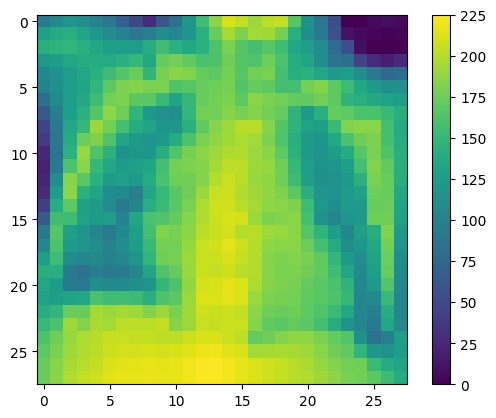

In [270]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [271]:
test_images[0]

array([[ 62,  19,  15,  42,  54,  74, 113, 138, 153, 153, 154, 156, 160,
        163, 159, 154, 155, 153, 116,  79,  73,  67,  61,  70,  63,  57,
         46,  37],
       [ 62,  32,  33,  54,  60,  75, 104, 121, 146, 146, 145, 145, 148,
        152, 150, 145, 133, 126,  96,  76,  84,  83,  73,  76,  83,  73,
         60,  48],
       [ 67,  60,  73,  94, 103, 113, 125, 128, 150, 150, 148, 145, 148,
        152, 149, 142, 140, 135, 121, 116, 121, 111,  97,  97,  98,  87,
         72,  61],
       [ 63,  68,  81,  98, 115, 133, 143, 142, 156, 160, 159, 156, 157,
        159, 152, 141, 126, 131, 138, 145, 140, 120, 102,  99,  95,  84,
         72,  68],
       [ 78,  86,  90,  95, 114, 133, 141, 141, 152, 160, 163, 161, 161,
        161, 149, 133, 100, 105, 123, 145, 150, 138, 117,  99,  84,  72,
         64,  66],
       [ 92, 116, 128, 131, 137, 131, 116, 112, 145, 157, 165, 163, 165,
        166, 152, 132, 106,  97, 107, 131, 151, 158, 137, 100,  80,  65,
         56,  59],
       [ 9

In [272]:
train_images = train_images / 255.0
val_images = val_images / 255.0
test_images = test_images / 255.0

In [273]:
test_images[0]

array([[0.24313725, 0.0745098 , 0.05882353, 0.16470588, 0.21176471,
        0.29019608, 0.44313725, 0.54117647, 0.6       , 0.6       ,
        0.60392157, 0.61176471, 0.62745098, 0.63921569, 0.62352941,
        0.60392157, 0.60784314, 0.6       , 0.45490196, 0.30980392,
        0.28627451, 0.2627451 , 0.23921569, 0.2745098 , 0.24705882,
        0.22352941, 0.18039216, 0.14509804],
       [0.24313725, 0.1254902 , 0.12941176, 0.21176471, 0.23529412,
        0.29411765, 0.40784314, 0.4745098 , 0.57254902, 0.57254902,
        0.56862745, 0.56862745, 0.58039216, 0.59607843, 0.58823529,
        0.56862745, 0.52156863, 0.49411765, 0.37647059, 0.29803922,
        0.32941176, 0.3254902 , 0.28627451, 0.29803922, 0.3254902 ,
        0.28627451, 0.23529412, 0.18823529],
       [0.2627451 , 0.23529412, 0.28627451, 0.36862745, 0.40392157,
        0.44313725, 0.49019608, 0.50196078, 0.58823529, 0.58823529,
        0.58039216, 0.56862745, 0.58039216, 0.59607843, 0.58431373,
        0.55686275, 0.5490

##Imagenes del set de entrenamiento con su respectiva etiqueta

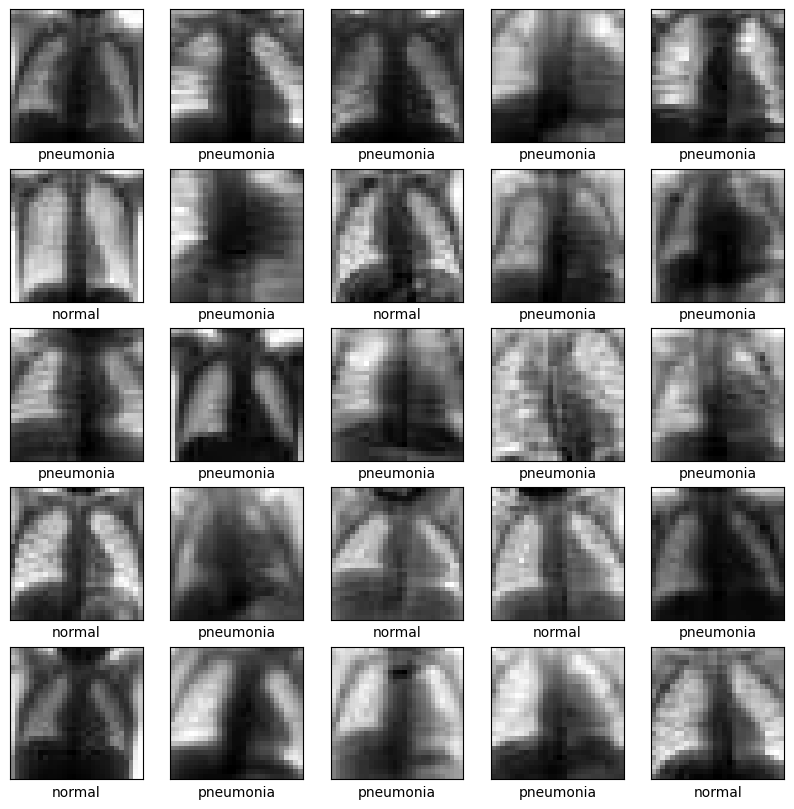

In [274]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels3[i]])
plt.show()

##Creacion de modelo de red neuroanl convolucional

In [275]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense
from tensorflow.keras.losses import BinaryCrossentropy, CategoricalCrossentropy
from tensorflow.keras.optimizers import SGD, Adam
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Crear el modelo secuencial
model = Sequential()

# Agregar la capa de convolución
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))

# Agregar capa de maxpooling
model.add(MaxPooling2D(pool_size=(2, 2)))

# Agregar otra capa de convolución
model.add(Conv2D(64, (3, 3), activation='relu'))

# Agregar otra capa de maxpooling
model.add(MaxPooling2D(pool_size=(2, 2)))

# Aplanar los mapas de características
model.add(Flatten())

# Agregar una capa totalmente conectada
model.add(Dense(64, activation='relu'))

# Agregar la capa de salida con activación sigmoide para clasificación binaria
model.add(Dense(1, activation='sigmoid'))


# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy',"AUC","binary_accuracy","TruePositives","TrueNegatives","FalsePositives","FalseNegatives"])


Entrenamiento del modelo

In [276]:
# Entrenar el modelo
H = model.fit(train_images, train_labels3, batch_size=32, epochs=10, validation_data=(val_images, val_labels3))


Epoch 1/10
148/148 [==============================] - 4s 15ms/step - loss: 0.3395 - accuracy: 0.8481 - auc: 0.9032 - binary_accuracy: 0.8481 - true_positives: 3382.0000 - true_negatives: 611.0000 - false_positives: 603.0000 - false_negatives: 112.0000 - val_loss: 0.2038 - val_accuracy: 0.9122 - val_auc: 0.9736 - val_binary_accuracy: 0.9122 - val_true_positives: 381.0000 - val_true_negatives: 97.0000 - val_false_positives: 38.0000 - val_false_negatives: 8.0000
Epoch 2/10
148/148 [==============================] - 1s 6ms/step - loss: 0.1828 - accuracy: 0.9261 - auc: 0.9733 - binary_accuracy: 0.9261 - true_positives: 3331.0000 - true_negatives: 1029.0000 - false_positives: 185.0000 - false_negatives: 163.0000 - val_loss: 0.2009 - val_accuracy: 0.9103 - val_auc: 0.9816 - val_binary_accuracy: 0.9103 - val_true_positives: 384.0000 - val_true_negatives: 93.0000 - val_false_positives: 42.0000 - val_false_negatives: 5.0000
Epoch 3/10
148/148 [==============================] - 1s 10ms/step - los

In [289]:
import matplotlib.pyplot as plt
history_dict = H.history
print(history_dict.keys())
print(history_dict)

dict_keys(['loss', 'accuracy', 'auc', 'binary_accuracy', 'true_positives', 'true_negatives', 'false_positives', 'false_negatives', 'val_loss', 'val_accuracy', 'val_auc', 'val_binary_accuracy', 'val_true_positives', 'val_true_negatives', 'val_false_positives', 'val_false_negatives'])
{'loss': [0.33949822187423706, 0.1827964037656784, 0.15445363521575928, 0.14477820694446564, 0.13494405150413513, 0.12712940573692322, 0.12440043687820435, 0.10896049439907074, 0.10391072183847427, 0.09424418956041336], 'accuracy': [0.8481308221817017, 0.9260832667350769, 0.9352166652679443, 0.9441376328468323, 0.9435003995895386, 0.949447751045227, 0.9528462290763855, 0.9585811495780945, 0.9592183232307434, 0.964103639125824], 'auc': [0.9032389521598816, 0.9732540845870972, 0.9810604453086853, 0.982988715171814, 0.9854702949523926, 0.9867621660232544, 0.9875491857528687, 0.9899431467056274, 0.9909172058105469, 0.9921739101409912], 'binary_accuracy': [0.8481308221817017, 0.9260832667350769, 0.93521666526794

Informacion de metricas

In [278]:
print("Perdida en set de entrenamiento",history_dict["loss"][len(history_dict["loss"])-1])
print("Perdida en set de validacion",history_dict["val_loss"][len(history_dict["val_loss"])-1])
print("------------------------------------------------------------------------------------")
print("Accuracy en set de entrenamiento",history_dict["accuracy"][len(history_dict["accuracy"])-1])
print("Accuracy en set de validacion",history_dict["val_accuracy"][len(history_dict["val_accuracy"])-1])
print("------------------------------------------------------------------------------------")
print("Auc en set de entrenamiento",history_dict["auc"][len(history_dict["auc"])-1])
print("Auc en set de validacion",history_dict["val_auc"][len(history_dict["val_auc"])-1])
print("------------------------------------------------------------------------------------")
print("Binary_accuracy en set de entrenamiento",history_dict["binary_accuracy"][len(history_dict["binary_accuracy"])-1])
print("Binary_accuracy en set de validacion",history_dict["val_binary_accuracy"][len(history_dict["val_binary_accuracy"])-1])

Perdida en set de entrenamiento 0.09424418956041336
Perdida en set de validacion 0.13315176963806152
------------------------------------------------------------------------------------
Accuracy en set de entrenamiento 0.964103639125824
Accuracy en set de validacion 0.9561068415641785
------------------------------------------------------------------------------------
Auc en set de entrenamiento 0.9921739101409912
Auc en set de validacion 0.9936303496360779
------------------------------------------------------------------------------------
Binary_accuracy en set de entrenamiento 0.964103639125824
Binary_accuracy en set de validacion 0.9561068415641785


Informacion para matriz de confusion

In [279]:
print("Verdaderos negativos set entrenamiento: ",history_dict["true_negatives"][len(history_dict["true_negatives"])-1])
print("------------------------------------------------")
print("Verdaderos negativos set de validacion: ",history_dict["val_true_negatives"][len(history_dict["val_true_negatives"])-1])
print("------------------------------------------------")
print("Verdaderos positivos set entrenamiento: ",history_dict["true_positives"][len(history_dict["true_positives"])-1])
print("------------------------------------------------")
print("Verdaderos positivos set de validacion: ",history_dict["val_true_positives"][len(history_dict["val_true_positives"])-1])
print("------------------------------------------------")
print("Falsos negativos set entrenamiento: ",history_dict["false_negatives"][len(history_dict["false_negatives"])-1])
print("------------------------------------------------")
print("Falsos negativos set de validacion: ",history_dict["val_false_negatives"][len(history_dict["val_false_negatives"])-1])
print("------------------------------------------------")
print("Falsos positivos set entrenamiento: ",history_dict["false_positives"][len(history_dict["false_positives"])-1])
print("------------------------------------------------")
print("Falsos positivos set de validacion: ",history_dict["val_false_positives"][len(history_dict["val_false_positives"])-1])

Verdaderos negativos set entrenamiento:  1125.0
------------------------------------------------
Verdaderos negativos set de validacion:  134.0
------------------------------------------------
Verdaderos positivos set entrenamiento:  3414.0
------------------------------------------------
Verdaderos positivos set de validacion:  367.0
------------------------------------------------
Falsos negativos set entrenamiento:  80.0
------------------------------------------------
Falsos negativos set de validacion:  22.0
------------------------------------------------
Falsos positivos set entrenamiento:  89.0
------------------------------------------------
Falsos positivos set de validacion:  1.0


Graficos de metricas

<Figure size 640x480 with 0 Axes>

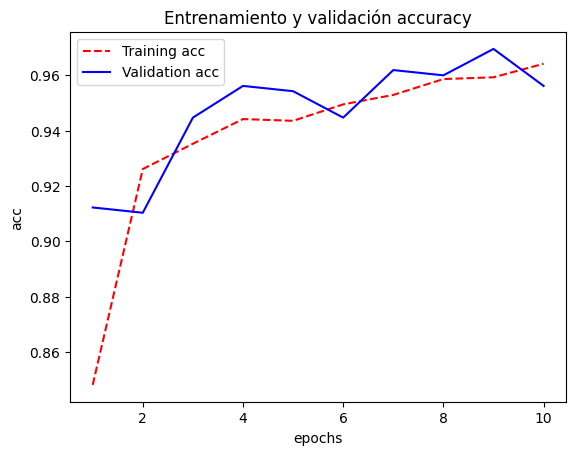

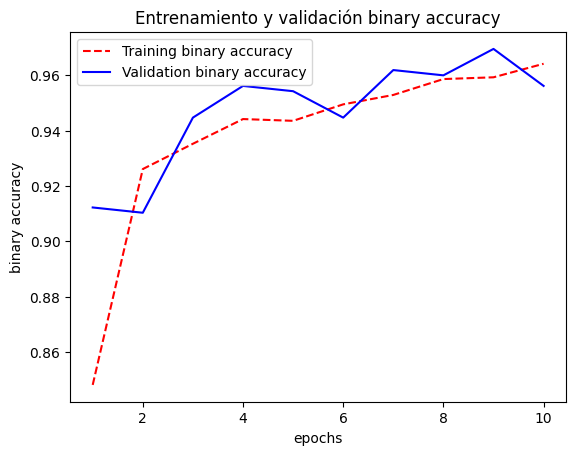

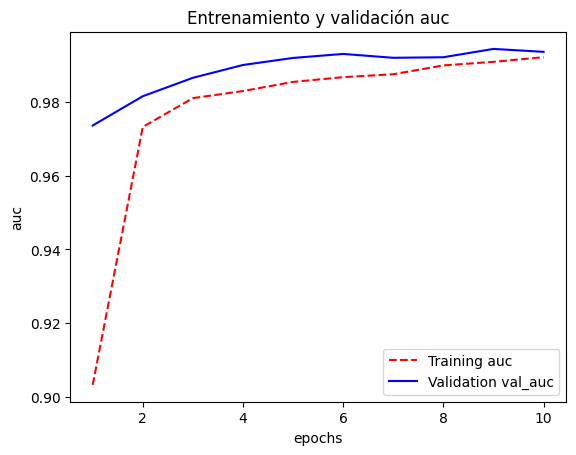

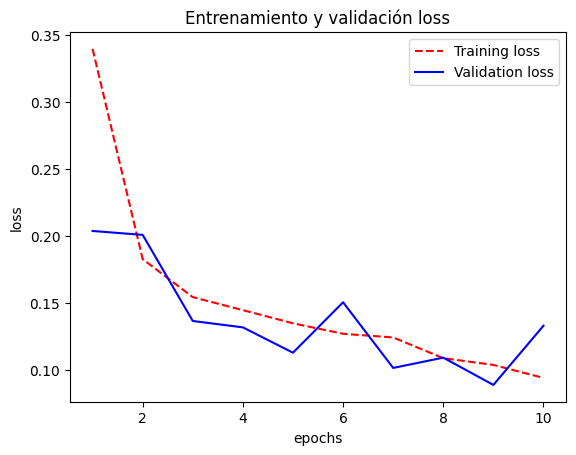

<Figure size 640x480 with 0 Axes>

In [280]:
acc      = H.history[     'accuracy' ]
val_acc  = H.history[ 'val_accuracy' ]
loss     = H.history[    'loss' ]
val_loss = H.history['val_loss' ]
auc = H.history["auc"]
val_auc = H.history['val_auc']
binary_accuracy = H.history['binary_accuracy']
val_binary_accuracy = H.history["val_binary_accuracy"]

epochs   = range(1,len(acc)+1,1)



plt.plot ( epochs,     acc, 'r--', label='Training acc'  )
plt.plot ( epochs, val_acc,  'b', label='Validation acc')
plt.title ('Entrenamiento y validación accuracy')
plt.ylabel('acc')
plt.xlabel('epochs')

plt.legend()
plt.figure()

plt.plot ( epochs,     binary_accuracy, 'r--', label='Training binary accuracy'  )
plt.plot ( epochs, val_binary_accuracy,  'b', label='Validation binary accuracy')
plt.title ('Entrenamiento y validación binary accuracy')
plt.ylabel('binary accuracy')
plt.xlabel('epochs')

plt.legend()
plt.figure()

plt.plot ( epochs,     auc, 'r--', label='Training auc'  )
plt.plot ( epochs, val_auc,  'b', label='Validation val_auc')
plt.title ('Entrenamiento y validación auc')
plt.ylabel('auc')
plt.xlabel('epochs')

plt.legend()
plt.figure()

plt.plot ( epochs,     loss, 'r--' , label='Training loss'  )
plt.plot ( epochs, val_loss ,  'b', label='Validation loss' )
plt.title ('Entrenamiento y validación loss'   )
plt.ylabel('loss')
plt.xlabel('epochs')

plt.legend()
plt.figure()

## Predicciones solo con numeros utilizando set de testeo

In [281]:
predictions = model.predict(test_images)

20/20 [==============================] - 0s 4ms/step


In [282]:
X = 1
print("Predccion del modelo: ", predictions[X])
print("Etiqueta real: ",test_labels3[X])

Predccion del modelo:  [0.99671763]
Etiqueta real:  0


Imagenes del set de testeo con su respectiva etiqueta

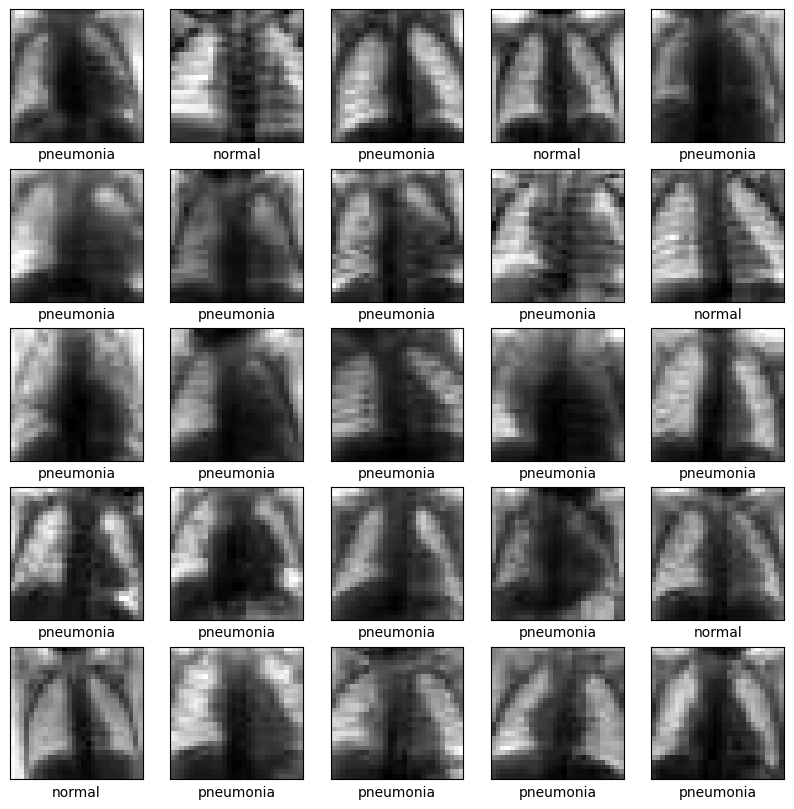

In [283]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[test_labels3[i]])
plt.show()

## Predicciones con graficos utilizando set de testeo

In [284]:
import matplotlib.pyplot as plt

def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i][0], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = {"Prediccion ": (round(predictions_array, 3)), "Etiqueta real ": true_label}
    plt.xlabel(predicted_label)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i][0], true_label[i]
    plt.grid(False)
    plt.xticks(range(2))
    yticks = ['0', '1']
    y = [0, 1]
    plt.yticks(y, yticks)

    plt.subplots_adjust(right=1.0)
    thisplot = plt.bar("Predicción", predictions_array, color ="purple" )
    for bar in thisplot:
      bar.set_width(0.85)
    plt.xlim(-1, 0.5)
    plt.axhline(y=1.0, color="black", linestyle="--")


20/20 [==============================] - 0s 2ms/step


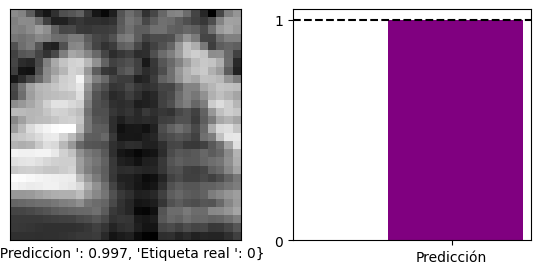

In [285]:
i = 1
predictions = model.predict(test_images)  # Realiza predicciones en los datos de prueba

plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions, test_labels3, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions, test_labels3)
plt.show()

## Informacion sobre las etiquetas
- 0 corresponde a pulmon normal

- 1 corresponde a pulmon con pneumonia

Grafico de torta para el set de testeo

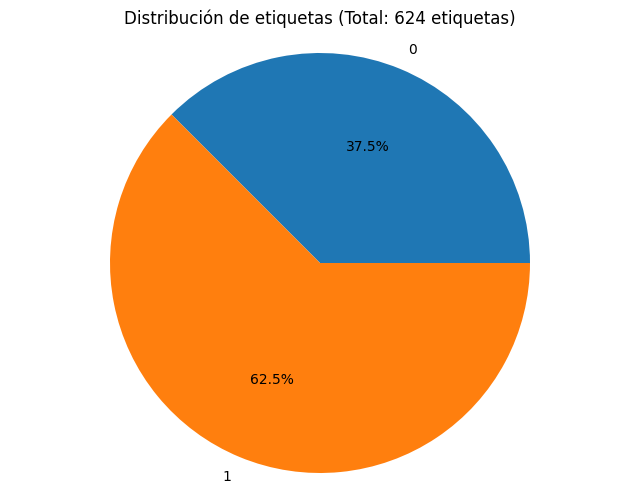

In [286]:
import matplotlib.pyplot as plt
import numpy as np

# Obtener la cantidad de imágenes por etiqueta
unique_labels, label_counts = np.unique(test_labels3, return_counts=True)
total_labels = len(test_labels3)  # Cantidad total de etiquetas

# Crear el gráfico de torta
plt.figure(figsize=(8, 6))
plt.pie(label_counts, labels=unique_labels, autopct='%1.1f%%')
plt.title(f'Distribución de etiquetas (Total: {total_labels} etiquetas)')
plt.axis('equal')
plt.show()


Grafico de torta para el set de entrenamiento

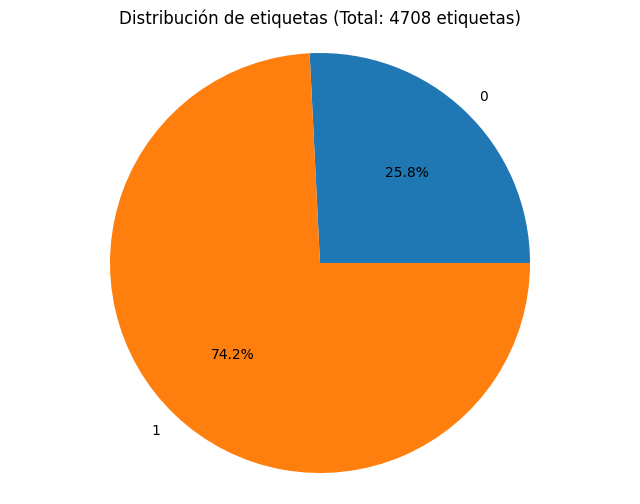

In [287]:
import matplotlib.pyplot as plt
import numpy as np

# Obtener la cantidad de imágenes por etiqueta
unique_labels, label_counts = np.unique(train_labels3, return_counts=True)
total_labels = len(train_labels3)  # Cantidad total de etiquetas

# Crear el gráfico de torta
plt.figure(figsize=(8, 6))
plt.pie(label_counts, labels=unique_labels, autopct='%1.1f%%')
plt.title(f'Distribución de etiquetas (Total: {total_labels} etiquetas)')
plt.axis('equal')
plt.show()



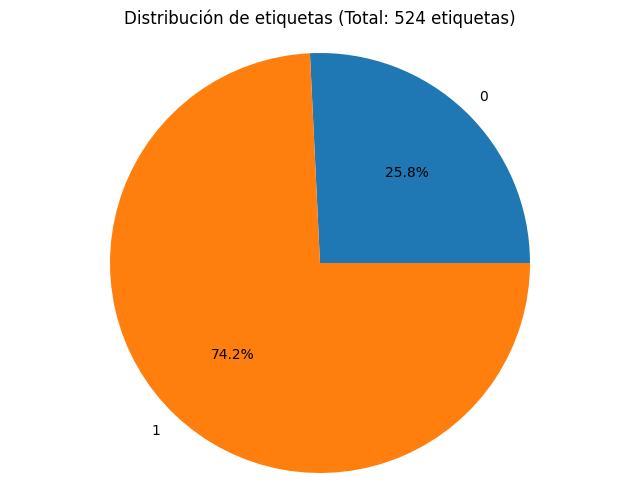

In [288]:
import matplotlib.pyplot as plt
import numpy as np

# Obtener la cantidad de imágenes por etiqueta
unique_labels, label_counts = np.unique(val_labels3, return_counts=True)
total_labels = len(val_labels3)  # Cantidad total de etiquetas

# Crear el gráfico de torta
plt.figure(figsize=(8, 6))
plt.pie(label_counts, labels=unique_labels, autopct='%1.1f%%')
plt.title(f'Distribución de etiquetas (Total: {total_labels} etiquetas)')
plt.axis('equal')
plt.show()
